In [70]:
from util import get_apl_ufloat, get_pct_error_ufloat
from uncertainties import ufloat, unumpy
from formulas import *
import formulas
%load_ext autoreload
%autoreload 2
import math
import pandas as pd

t_error = 50e-6

C = get_apl_ufloat(0.00000004833)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
4.833e-08


In [71]:
t_a = get_pct_error_ufloat(0.017545199000, t_error) - get_pct_error_ufloat(0.017125198600, t_error)

print("Inductor A:\n", get_inductance(t_a, C))

Inductor A:
 Period :0.000420000+/-0.000001226
Frequency: 2380.950113381+/-6.949383599
Angular Frequency: 14959.950769522+/-43.664264921, 
Inductance: 0.092453398+/-0.000540034


In [72]:
t_b = get_pct_error_ufloat(0.017512800200,t_error) - get_pct_error_ufloat(0.017087198800,t_error)

print("Inductor B:\n", get_inductance(t_b, C))

Inductor B:
 Period :0.000425601+/-0.000001223
Frequency: 2349.616331149+/-6.753950137
Angular Frequency: 14763.074809386+/-42.436320266, 
Inductance: 0.094935702+/-0.000546137


In [73]:

def optimize(x,y, func, xlabel = 'X', ylabel ='Y', title = None, **kwargs):
        # Fit the sine curve using curve_fit
        popt, cov_matrix= curve_fit(func, x, y,**kwargs)

        param_uncertainties = np.sqrt(np.diag(cov_matrix))

        params = unumpy.uarray(popt, param_uncertainties)

        print(f"Parameters sin*exp fit for {sheet}: {params}")

        # Plot the original data and the fitted curve
        plt.plot(x, y, 'o', label='data')
        plt.plot(x, func(x, *popt), '-', label='Sine fit')
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(sheet if title is None else title)
        plt.legend()
        plt.show()

Curve Fitting

Parameters sin*exp fit for inductor_A: [3.0396292540572802+/-0.003493003305561324
 14565.990108951759+/-4.477701622936327
 3.474875998703008+/-0.07773820507270557
 0.3447089115147347+/-0.002568903007410543]


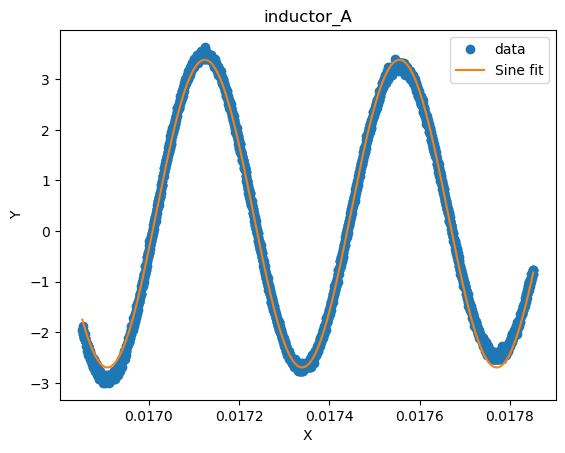

In [74]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def sinefunction(x, a, b, c, d):
    return a * np.sin((b*x) + c) + d


freq_map = {'inductor_A':2349.616331149, 'inductor_B':2380.950113381}

fit_ind = ['inductor_A']

# Assuming 'Time' and 'Voltage' columns exist in the Excel file
for sheet in fit_ind:
    ceo_data = pd.read_excel('data/CEO/CEO_data.xlsx', sheet_name=sheet)

    x = ceo_data['Time']
    y = ceo_data['Voltage(transformed)']


    optimize(x,y, sinefunction, p0 =[3,2*math.pi*freq_map[sheet],0,0] ,maxfev = 100000000)


Parameters sin*exp fit for inductor_A_full: [-62.5108593713967+/-0.17970740831264664
 14557.573370318882+/-0.1629776427325442
 6.950710055808875+/-0.0028569594836904
 350.052027430324+/-0.32797397907798626
 -0.02872048205632877+/-0.0006300992496811531]


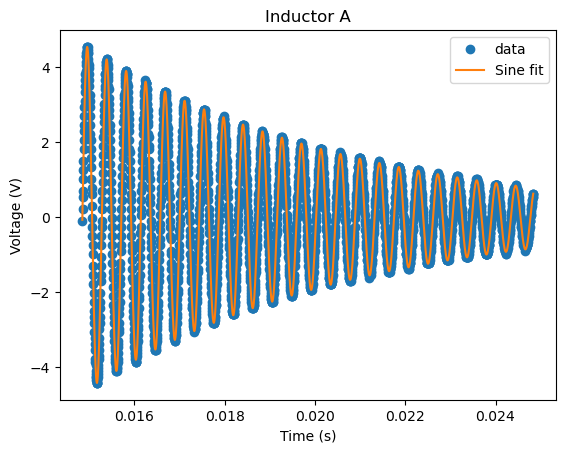

In [75]:

def sinefunction_exp(x, a, b, c, d,e):
    return a * np.sin((b*x) + c)*np.exp(-d*x/2) + e
# Assuming 'Time' and 'Voltage' columns exist in the Excel file

freq_map['inductor_A_full'] = freq_map['inductor_A']
for sheet in ['inductor_A_full']:
    ceo_data = pd.read_excel('data/CEO/CEO_data.xlsx', sheet_name=sheet)

    x = ceo_data['Time']
    y = ceo_data['Voltage(transformed)']

    optimize(x,y, sinefunction_exp, p0 =[3.04,2*math.pi*freq_map[sheet],3.5,0,0.3] ,maxfev = 100000000, xlabel = 'Time (s)', ylabel = 'Voltage (V)', title = 'Inductor A')



In [76]:
d = ufloat(350.052027430324,0.32797397907798626)

In [77]:
tau = 2/d

In [78]:
tau


0.0057134364131003045+/-5.353085620926865e-06

In [79]:
w = ufloat(14557.573370318882, 0.1629776427325442)
L=  1/((w**2)*C)

L

0.09763493233024571+/-2.0319664889163915e-05

In [80]:
R = L*d

In [81]:
R

34.177306010225+/-0.03280219946511787

In [82]:
Q= w/d

In [83]:
Q

41.58688489017961+/-0.038966749862144025

In [84]:
w_prime = w*(1-((d**2)/(4 * (w**2)))**0.5)

In [85]:
w_prime


14382.54735660372+/-0.23120001031297263

In [86]:
(1-w_prime/w)

0.01202302123182275+/-1.126552426720274e-05

In [87]:
w_prime/(2*math.pi)

2289.053506056755+/-0.03679662448420677

In [88]:
t_2beats_B = get_pct_error_ufloat(0.02676999941) - get_pct_error_ufloat(0.01425)

In [89]:
f_B = 2/t_2beats_B

In [90]:
f_B

159.74441647357875+/-11.6081933503168

In [91]:
t_2beats_A = get_pct_error_ufloat(0.02998999879) -get_pct_error_ufloat(0.0175299998)

In [92]:
f_A = 2/t_2beats_A

In [93]:
f_A

160.5136566708502+/-13.425023609799187

In [94]:
avg_f = (f_A + f_B)/2

In [95]:
avg_f

160.1290365722145+/-8.873857838927846

In [96]:
#avg_L = (ufloat(0.094935702, 0.000546137) + ufloat(0.092453398, 0.000540034)) / 2

avg_L = L

C_b = get_apl_ufloat(48.43e-9)
avg_C = (C +C_b)/2
avg_C, avg_L, C

4.843e-08


(4.838e-08+/-7.071067811865475e-12,
 0.09763493233024571+/-2.0319664889163915e-05,
 4.833e-08+/-1e-11)

In [97]:
def get_coupled_capacitance(L,C,f_b):
    w_b = 2 * math.pi * f_b

    term0=(1/((L*C)**(0.5)))
    term = ((term0 - w_b)**(-2))

    return (term - L*C )/ (2*L)


In [98]:
C_coupling = get_coupled_capacitance(L=avg_L,C =avg_C, f_b = avg_f)

In [99]:
convert_nano(C_coupling)

(3.7274321901718435+/-0.22985542280949767, 'nano')

In [100]:
C

4.833e-08+/-1e-11

In [101]:
avg_L, avg_f

(0.09763493233024571+/-2.0319664889163915e-05,
 160.1290365722145+/-8.873857838927846)

Calculating Errors

In [102]:
formulas.get_deviations(measured = L, accepted = 100e-3)

('2.365+/-0.020%', '116.3930449963049')

In [103]:
formulas.get_deviations(measured = C_coupling, accepted = 3.84e-9)

('3+/-6%', '0.48973310462834707')